# TP 3 Reinforcement Learning

## Antonin GAY - MVA 2018-19

### 1. Gaussian policy model

In this first part, we consider a Gaussian policy model, meaning that the selected action by the policy in a state $s_t$ is based on a Normal law. Here, the variance of the law is fixed ($\sigma=0.4$), but the mean is depending on the current state, with a parameter to determine : $\mu=\theta *s_t$, where $\theta$ is to be determined.

To do that, we will implement the REINFORCE algorithm, and test different parametrizations of this algorithm.

The REINFORCE algorithm is based on a simulation of the polic

Firstly, we will estimate the effet of the number and durations of the trajectories, on a stepper of the form $\alpha_t={learning rate}/t$.

The first simulation will be with $N=40$ and $T=10$, the second one with $N=10$ and $T=40$ : same number of steps (as none of our state is terminal), but dispatched differently. We also take a little learning rate, in order to see the difference between the two

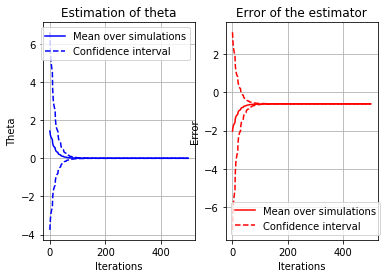

In [1]:
%matplotlib inline
from src.mainTP3_PG import *
import src.lqg1d as lqg1d

env = lqg1d.LQG1D(initial_state_type='random')
policy = GaussianPolicy(theta=-0.6, sigma=0.4)

h_theta, h_diff = lqg_reinforce(env, policy, n_simu=10, n_traj=50, t_max=10,
                                stepper=stepper_invers, learning_rate=0.0002, discount=0.95,
                                verbose=False)

plot_results(h_theta, h_diff)


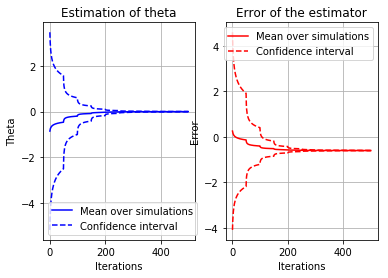

In [2]:
h_theta, h_diff = lqg_reinforce(env, policy, n_simu=10, n_traj=10, t_max=50,
                                stepper=stepper_invers, learning_rate=0.0002, discount=0.95,
                                verbose=False)

plot_results(h_theta, h_diff)


We first see that a higher number of trajectories is more interesting that long trajectories in this case. This is logical as the stepper is decreasing inside of trajectories, thus the last states of them are less important for the convergence of $\theta$

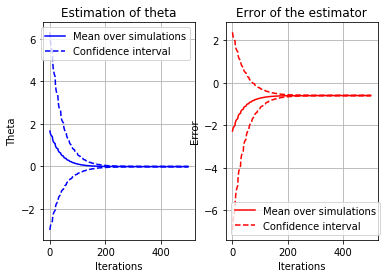

In [3]:
policy = GaussianPolicy(theta=-0.6, sigma=1)

h_theta, h_diff = lqg_reinforce(env, policy, n_simu=10, n_traj=50, t_max=10,
                                stepper=stepper_invers, learning_rate=0.0005, discount=0.95,
                                verbose=False)

plot_results(h_theta, h_diff)

The last graphs show us that ahigher value of $\sigma$, and thus a higher dispersion of the samples, makes the convergence slower.

Finally, we obtain the quickest convergence with the following results:

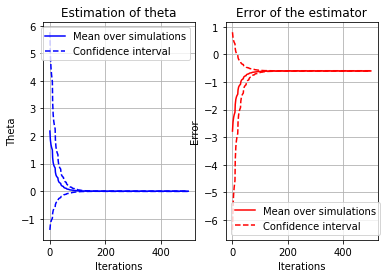

In [4]:
policy = GaussianPolicy(theta=-0.6, sigma=0.4)

h_theta, h_diff = lqg_reinforce(env, policy, n_simu=10, n_traj=50, t_max=10,
                                stepper=stepper_invers, learning_rate=0.0002, discount=0.95,
                                verbose=False)

plot_results(h_theta, h_diff)


### Q2. Exploratory bonus

When we try to get the best estimation of $\theta$, we want to make sure to get through all the possible action-state, in order to get the maximum informations. The chosen solution has been to use a stochastic exploration policy, which gives us higher chances to see all the possible actions in one state.

Another possible solution is to give a bonus to the new action-state tuples when computing $\theta$. By this way, a new point will have more impact on the evolution of $\theta$ than an already visited one. We apply this solution by adding to the reward of each step a parameter, decreasing with the number of time we visited the actual action-state.

This bonus has been implemented in the code, and is tested in the next example:

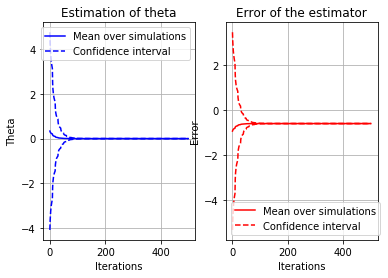

In [6]:
policy = GaussianPolicy(theta=-0.6, sigma=0.4)

h_theta, h_diff = lqg_reinforce(env, policy, n_simu=10, n_traj=50, t_max=10,
                                stepper=stepper_invers, learning_rate=0.0002, discount=0.95,
                                expl_bonus=True, expl_grid_width=10,
                                verbose=False)

plot_results(h_theta, h_diff)


With the exploratory bonus, the convergence is faster at the very begining of the optimisation. Though, it could be du to the fact that the gradient has been augmented wehn multiplied to our new factor, which would fasten the convergence in any cases.

### Q3 FQI algorithm

As proposed in the subject, I tried to implement the FQI algorithm. Unfortunately, this one did not give me great results : the computed $Q$ is converging, but not to the $Q_{opt}$ previously obtained in the code, as we can see on the next figures.

Going through Dataset - 1 over 5:   0%|          | 0/25 [00:00<?, ?it/s]

Going through Dataset - 1 over 5:   4%|▍         | 1/25 [00:01<00:43,  1.82s/it]

Going through Dataset - 1 over 5:   8%|▊         | 2/25 [00:03<00:38,  1.66s/it]

Going through Dataset - 1 over 5:  12%|█▏        | 3/25 [00:04<00:31,  1.45s/it]

Going through Dataset - 1 over 5:  16%|█▌        | 4/25 [00:04<00:25,  1.23s/it]

Going through Dataset - 1 over 5:  20%|██        | 5/25 [00:05<00:22,  1.10s/it]

Going through Dataset - 1 over 5:  24%|██▍       | 6/25 [00:06<00:19,  1.01s/it]

Going through Dataset - 1 over 5:  28%|██▊       | 7/25 [00:07<00:17,  1.05it/s]

Going through Dataset - 1 over 5:  32%|███▏      | 8/25 [00:08<00:15,  1.11it/s]

Going through Dataset - 1 over 5:  36%|███▌      | 9/25 [00:08<00:13,  1.15it/s]

Going through Dataset - 1 over 5:  40%|████      | 10/25 [00:09<00:12,  1.21it/s]

Going through Dataset - 1 over 5:  44%|████▍     | 11/25 [00:10<00:11,  1.22it/s]

Going through Dataset - 1 over 5:  48%|████▊     | 12/25 [00:11<00:10,  1.26it/s]

Going through Dataset - 1 over 5:  52%|█████▏    | 13/25 [00:11<00:09,  1.31it/s]

Going through Dataset - 1 over 5:  56%|█████▌    | 14/25 [00:12<00:08,  1.23it/s]

Going through Dataset - 1 over 5:  60%|██████    | 15/25 [00:13<00:08,  1.15it/s]

Going through Dataset - 1 over 5:  64%|██████▍   | 16/25 [00:14<00:07,  1.18it/s]

Going through Dataset - 1 over 5:  68%|██████▊   | 17/25 [00:15<00:06,  1.23it/s]

Going through Dataset - 1 over 5:  72%|███████▏  | 18/25 [00:16<00:05,  1.24it/s]

Going through Dataset - 1 over 5:  76%|███████▌  | 19/25 [00:16<00:04,  1.25it/s]

Going through Dataset - 1 over 5:  80%|████████  | 20/25 [00:17<00:03,  1.25it/s]

Going through Dataset - 1 over 5:  84%|████████▍ | 21/25 [00:18<00:03,  1.27it/s]

Going through Dataset - 1 over 5:  88%|████████▊ | 22/25 [00:19<00:02,  1.27it/s]

Going through Dataset - 1 over 5:  92%|█████████▏| 23/25 [00:19<00:01,  1.29it/s]

Going through Dataset - 1 over 5:  96%|█████████▌| 24/25 [00:20<00:00,  1.31it/s]

Going through Dataset - 1 over 5: 100%|██████████| 25/25 [00:21<00:00,  1.40it/s]

Going through Dataset - 2 over 5:   0%|          | 0/25 [00:00<?, ?it/s]

Going through Dataset - 2 over 5:   4%|▍         | 1/25 [00:00<00:16,  1.48it/s]

Going through Dataset - 2 over 5:   8%|▊         | 2/25 [00:01<00:15,  1.53it/s]

Going through Dataset - 2 over 5:  12%|█▏        | 3/25 [00:01<00:14,  1.55it/s]

Going through Dataset - 2 over 5:  16%|█▌        | 4/25 [00:02<00:13,  1.59it/s]

Going through Dataset - 2 over 5:  20%|██        | 5/25 [00:03<00:12,  1.61it/s]

Going through Dataset - 2 over 5:  24%|██▍       | 6/25 [00:03<00:11,  1.63it/s]

Going through Dataset - 2 over 5:  28%|██▊       | 7/25 [00:04<00:10,  1.64it/s]

Going through Dataset - 2 over 5:  32%|███▏      | 8/25 [00:04<00:10,  1.66it/s]

Going through Dataset - 2 over 5:  36%|███▌      | 9/25 [00:05<00:09,  1.67it/s]

Going through Dataset - 2 over 5:  40%|████      | 10/25 [00:06<00:08,  1.68it/s]

Going through Dataset - 2 over 5:  44%|████▍     | 11/25 [00:06<00:08,  1.66it/s]

Going through Dataset - 2 over 5:  48%|████▊     | 12/25 [00:07<00:07,  1.67it/s]

Going through Dataset - 2 over 5:  52%|█████▏    | 13/25 [00:07<00:07,  1.66it/s]

Going through Dataset - 2 over 5:  56%|█████▌    | 14/25 [00:08<00:06,  1.67it/s]

Going through Dataset - 2 over 5:  60%|██████    | 15/25 [00:09<00:05,  1.68it/s]

Going through Dataset - 2 over 5:  64%|██████▍   | 16/25 [00:09<00:05,  1.68it/s]

Going through Dataset - 2 over 5:  68%|██████▊   | 17/25 [00:10<00:04,  1.68it/s]

Going through Dataset - 2 over 5:  72%|███████▏  | 18/25 [00:10<00:04,  1.68it/s]

Going through Dataset - 2 over 5:  76%|███████▌  | 19/25 [00:11<00:03,  1.68it/s]

Going through Dataset - 2 over 5:  80%|████████  | 20/25 [00:12<00:02,  1.69it/s]

Going through Dataset - 2 over 5:  84%|████████▍ | 21/25 [00:12<00:02,  1.68it/s]

Going through Dataset - 2 over 5:  88%|████████▊ | 22/25 [00:13<00:01,  1.67it/s]

Going through Dataset - 2 over 5:  92%|█████████▏| 23/25 [00:13<00:01,  1.68it/s]

Going through Dataset - 2 over 5:  96%|█████████▌| 24/25 [00:14<00:00,  1.68it/s]

Going through Dataset - 2 over 5: 100%|██████████| 25/25 [00:15<00:00,  1.68it/s]

Going through Dataset - 3 over 5:   0%|          | 0/25 [00:00<?, ?it/s]

Going through Dataset - 3 over 5:   4%|▍         | 1/25 [00:00<00:14,  1.70it/s]

Going through Dataset - 3 over 5:   8%|▊         | 2/25 [00:01<00:13,  1.70it/s]

Going through Dataset - 3 over 5:  12%|█▏        | 3/25 [00:01<00:12,  1.69it/s]

Going through Dataset - 3 over 5:  16%|█▌        | 4/25 [00:02<00:12,  1.69it/s]

Going through Dataset - 3 over 5:  20%|██        | 5/25 [00:02<00:11,  1.69it/s]

Going through Dataset - 3 over 5:  24%|██▍       | 6/25 [00:03<00:11,  1.69it/s]

Going through Dataset - 3 over 5:  28%|██▊       | 7/25 [00:04<00:10,  1.69it/s]

Going through Dataset - 3 over 5:  32%|███▏      | 8/25 [00:04<00:10,  1.69it/s]

Going through Dataset - 3 over 5:  36%|███▌      | 9/25 [00:05<00:09,  1.69it/s]

Going through Dataset - 3 over 5:  40%|████      | 10/25 [00:05<00:08,  1.69it/s]

Going through Dataset - 3 over 5:  44%|████▍     | 11/25 [00:06<00:08,  1.69it/s]

Going through Dataset - 3 over 5:  48%|████▊     | 12/25 [00:07<00:07,  1.69it/s]

Going through Dataset - 3 over 5:  52%|█████▏    | 13/25 [00:07<00:07,  1.66it/s]

Going through Dataset - 3 over 5:  56%|█████▌    | 14/25 [00:08<00:06,  1.66it/s]

Going through Dataset - 3 over 5:  60%|██████    | 15/25 [00:08<00:05,  1.67it/s]

Going through Dataset - 3 over 5:  64%|██████▍   | 16/25 [00:09<00:05,  1.67it/s]

Going through Dataset - 3 over 5:  68%|██████▊   | 17/25 [00:10<00:04,  1.68it/s]

Going through Dataset - 3 over 5:  72%|███████▏  | 18/25 [00:10<00:04,  1.69it/s]

Going through Dataset - 3 over 5:  76%|███████▌  | 19/25 [00:11<00:03,  1.69it/s]

Going through Dataset - 3 over 5:  80%|████████  | 20/25 [00:11<00:02,  1.68it/s]

Going through Dataset - 3 over 5:  84%|████████▍ | 21/25 [00:12<00:02,  1.69it/s]

Going through Dataset - 3 over 5:  88%|████████▊ | 22/25 [00:13<00:01,  1.68it/s]

Going through Dataset - 3 over 5:  92%|█████████▏| 23/25 [00:13<00:01,  1.68it/s]

Going through Dataset - 3 over 5:  96%|█████████▌| 24/25 [00:14<00:00,  1.68it/s]

Going through Dataset - 3 over 5: 100%|██████████| 25/25 [00:14<00:00,  1.68it/s]

Going through Dataset - 4 over 5:   0%|          | 0/25 [00:00<?, ?it/s]

Going through Dataset - 4 over 5:   4%|▍         | 1/25 [00:00<00:14,  1.68it/s]

Going through Dataset - 4 over 5:   8%|▊         | 2/25 [00:01<00:13,  1.69it/s]

Going through Dataset - 4 over 5:  12%|█▏        | 3/25 [00:01<00:13,  1.69it/s]

Going through Dataset - 4 over 5:  16%|█▌        | 4/25 [00:02<00:12,  1.69it/s]

Going through Dataset - 4 over 5:  20%|██        | 5/25 [00:02<00:11,  1.69it/s]

Going through Dataset - 4 over 5:  24%|██▍       | 6/25 [00:03<00:11,  1.69it/s]

Going through Dataset - 4 over 5:  28%|██▊       | 7/25 [00:04<00:10,  1.69it/s]

Going through Dataset - 4 over 5:  32%|███▏      | 8/25 [00:04<00:10,  1.69it/s]

Going through Dataset - 4 over 5:  36%|███▌      | 9/25 [00:05<00:09,  1.69it/s]

Going through Dataset - 4 over 5:  40%|████      | 10/25 [00:05<00:08,  1.69it/s]

Going through Dataset - 4 over 5:  44%|████▍     | 11/25 [00:06<00:08,  1.70it/s]

Going through Dataset - 4 over 5:  48%|████▊     | 12/25 [00:07<00:07,  1.69it/s]

Going through Dataset - 4 over 5:  52%|█████▏    | 13/25 [00:07<00:07,  1.69it/s]

Going through Dataset - 4 over 5:  56%|█████▌    | 14/25 [00:08<00:06,  1.69it/s]

Going through Dataset - 4 over 5:  60%|██████    | 15/25 [00:08<00:05,  1.69it/s]

Going through Dataset - 4 over 5:  64%|██████▍   | 16/25 [00:09<00:05,  1.69it/s]

Going through Dataset - 4 over 5:  68%|██████▊   | 17/25 [00:10<00:04,  1.69it/s]

Going through Dataset - 4 over 5:  72%|███████▏  | 18/25 [00:10<00:04,  1.69it/s]

Going through Dataset - 4 over 5:  76%|███████▌  | 19/25 [00:11<00:03,  1.69it/s]

Going through Dataset - 4 over 5:  80%|████████  | 20/25 [00:11<00:03,  1.65it/s]

Going through Dataset - 4 over 5:  84%|████████▍ | 21/25 [00:12<00:02,  1.65it/s]

Going through Dataset - 4 over 5:  88%|████████▊ | 22/25 [00:13<00:01,  1.66it/s]

Going through Dataset - 4 over 5:  92%|█████████▏| 23/25 [00:13<00:01,  1.66it/s]

Going through Dataset - 4 over 5:  96%|█████████▌| 24/25 [00:14<00:00,  1.67it/s]

Going through Dataset - 4 over 5: 100%|██████████| 25/25 [00:14<00:00,  1.65it/s]

Going through Dataset - 5 over 5:   0%|          | 0/25 [00:00<?, ?it/s]

Going through Dataset - 5 over 5:   4%|▍         | 1/25 [00:00<00:14,  1.68it/s]

Going through Dataset - 5 over 5:   8%|▊         | 2/25 [00:01<00:13,  1.69it/s]

Going through Dataset - 5 over 5:  12%|█▏        | 3/25 [00:01<00:13,  1.68it/s]

Going through Dataset - 5 over 5:  16%|█▌        | 4/25 [00:02<00:12,  1.68it/s]

Going through Dataset - 5 over 5:  20%|██        | 5/25 [00:02<00:11,  1.69it/s]

Going through Dataset - 5 over 5:  24%|██▍       | 6/25 [00:03<00:11,  1.69it/s]

Going through Dataset - 5 over 5:  28%|██▊       | 7/25 [00:04<00:10,  1.69it/s]

Going through Dataset - 5 over 5:  32%|███▏      | 8/25 [00:04<00:10,  1.67it/s]

Going through Dataset - 5 over 5:  36%|███▌      | 9/25 [00:05<00:09,  1.68it/s]

Going through Dataset - 5 over 5:  40%|████      | 10/25 [00:05<00:08,  1.67it/s]

Going through Dataset - 5 over 5:  44%|████▍     | 11/25 [00:06<00:08,  1.68it/s]

Going through Dataset - 5 over 5:  48%|████▊     | 12/25 [00:07<00:07,  1.68it/s]

Going through Dataset - 5 over 5:  52%|█████▏    | 13/25 [00:07<00:07,  1.68it/s]

Going through Dataset - 5 over 5:  56%|█████▌    | 14/25 [00:08<00:06,  1.69it/s]

Going through Dataset - 5 over 5:  60%|██████    | 15/25 [00:08<00:06,  1.66it/s]

Going through Dataset - 5 over 5:  64%|██████▍   | 16/25 [00:09<00:05,  1.66it/s]

Going through Dataset - 5 over 5:  68%|██████▊   | 17/25 [00:10<00:04,  1.63it/s]

Going through Dataset - 5 over 5:  72%|███████▏  | 18/25 [00:10<00:04,  1.65it/s]

Going through Dataset - 5 over 5:  76%|███████▌  | 19/25 [00:11<00:03,  1.66it/s]

Going through Dataset - 5 over 5:  80%|████████  | 20/25 [00:11<00:02,  1.67it/s]

Going through Dataset - 5 over 5:  84%|████████▍ | 21/25 [00:12<00:02,  1.68it/s]

Going through Dataset - 5 over 5:  88%|████████▊ | 22/25 [00:13<00:01,  1.68it/s]

Going through Dataset - 5 over 5:  92%|█████████▏| 23/25 [00:13<00:01,  1.68it/s]

Going through Dataset - 5 over 5:  96%|█████████▌| 24/25 [00:14<00:00,  1.68it/s]

Going through Dataset - 5 over 5: 100%|██████████| 25/25 [00:14<00:00,  1.68it/s]

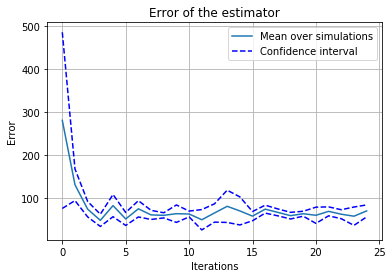

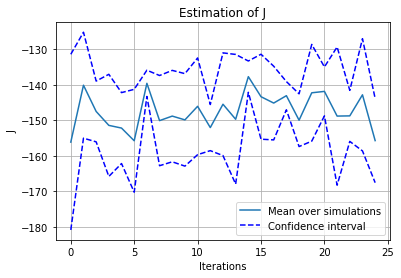

In [3]:
%matplotlib inline
from src.mainTP3_FQI import *

horizon = 50
N = 25  # This is the parameter with most impact on the duration if J is calculated
T = 100
n_simu = 5
lambd = 0.1

env, discrete_actions, discrete_states, sa = gen_env_sa()

gamma = 0.2
q_opt = compute_q_opt(env, sa, gamma)
historic_q, historic_j = fqi(env, discrete_actions, n_simu, N, T, gamma, lambd, sa, q_opt, compute_j=True)
plot_fqi(historic_q, historic_j)
